<a href="https://colab.research.google.com/github/mondjisola/dpro_divic/blob/master/Credit_information_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## **[Problem 1] Confirmation of competition contents**

</div>


<div class="markdown-google-sans">

### **What to learn and predict**

</div>

- **Objective**: The goal is to learn Home Credit clients' repayment abilities.
- **Prediction**: A probability (a value between 0 and 1) that indicates the likelihood of loan repayement of an applicant.

<div class="markdown-google-sans">

### **File submission**

</div>

The submission file should be a CSV file containing two columns: `SK_ID_CURR` (the ID of the loan application) and `TARGET` (the predicted probability of repayement).

<div class="markdown-google-sans">

### **Evaluation metric**

</div>

The submissions are evaluated based on the ROC AUC (Receiver Operating Characteristic Area Under the Curve). This metric measures the ability of the model to distinguish between the positive class (default) and the negative class (no default).

<div class="markdown-google-sans">

##**[Problem 2] Learning and verification**

</div>

In [ ]:
# @title Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

In [ ]:
# @title Loading the datasets

drive.mount('/content/drive')
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dive into code/Data/application_train.csv')
app_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dive into code/Data/application_test.csv')

Mounted at /content/drive


### Basic EDA and preprocessing

In [ ]:
app_train.shape

(307511, 122)

There are 307511 observations and 122 variables in our dataset.

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Our initial dataset contains 106 numeric (65 as float64 and 41 as int64) and 16 categorical variables (of object data type).

In [ ]:
app_train_isna = app_train.isnull().sum()
app_train_isna

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
app_train_isna_pct = app_train.isnull().mean() * 100
app_train_isna_pct.sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

The highest percentage of missing value is around 69%.

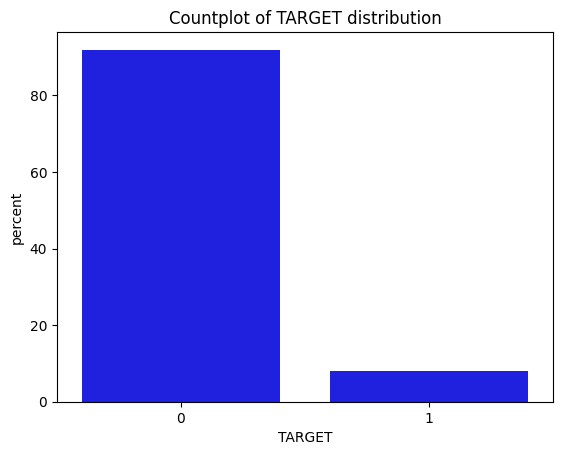

In [ ]:
plt.title('Countplot of TARGET distribution')
sns.countplot(x = 'TARGET', data = app_train, color = 'blue', stat='percent');

From the counting diagram we can have the observations below:
- More than 90% of applicants do not repay their loans.
- Only a little less than 10% manage to repay.

This outlines an unbalanced class problem. Now, let's fill missing values and encode categorical values.

In [ ]:
# # For numerical data, we use the mean
numeric_imputer = SimpleImputer(strategy='mean')
numeric_columns = app_train.select_dtypes(include=['int64', 'float64']).columns
app_train[numeric_columns] = numeric_imputer.fit_transform(app_train[numeric_columns])

# # For categorical data, we use the mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = app_train.select_dtypes(include=['object']).columns
app_train[categorical_columns] = categorical_imputer.fit_transform(app_train[categorical_columns])

# Encode categorical variables
encoder = OrdinalEncoder()
app_train[categorical_columns] = encoder.fit_transform(app_train[categorical_columns])

In our dataset, the column `SK_ID_CURR` have only ID values, assuming they don't have any predictive power to predict the dependent variable. So we will drop it, and separate features and target variables.

Next, we'll fill in missing values and encode categorical values.

In [ ]:
app_train = app_train.drop(['SK_ID_CURR'], axis = 1)

X = app_train.drop(['TARGET'], axis = 1)
y = app_train['TARGET']

Now, we will split and train the model with RandomForestClassifier as baseline model.

In [ ]:
# Entraîner un modèle de RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

<div class="markdown-google-sans">

##**[Problem 3] Estimation on test data**

</div>

In [ ]:
# @title Preprocessing

# For numerical data, we use the mean
numeric_imputer = SimpleImputer(strategy='mean')
numeric_columns = app_test.select_dtypes(include=['int64', 'float64']).columns
app_test[numeric_columns] = numeric_imputer.fit_transform(app_test[numeric_columns])

# For categorical data, we use the mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = app_test.select_dtypes(include=['object']).columns
app_test[categorical_columns] = categorical_imputer.fit_transform(app_test[categorical_columns])

# Encode categorical variables
encoder = OrdinalEncoder()
app_test[categorical_columns] = encoder.fit_transform(app_test[categorical_columns])

In [ ]:
# @title Prediction and submission

# Predict probabilities on test data
ids = app_test['SK_ID_CURR']
X_test = app_test.drop(columns=['SK_ID_CURR'])
y_test = model.predict_proba(X_test)[:, 1]

# Create submission file
submission = pd.DataFrame({'SK_ID_CURR': ids, 'TARGET': y_test})
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully.")

Submission file created successfully.


In [ ]:
sub = pd.read_csv('submission.csv')
sub.head()

,SK_ID_CURR,TARGET
0,100001.0,0.12
1,100005.0,0.07
2,100013.0,0.06
3,100028.0,0.00
4,100038.0,0.09


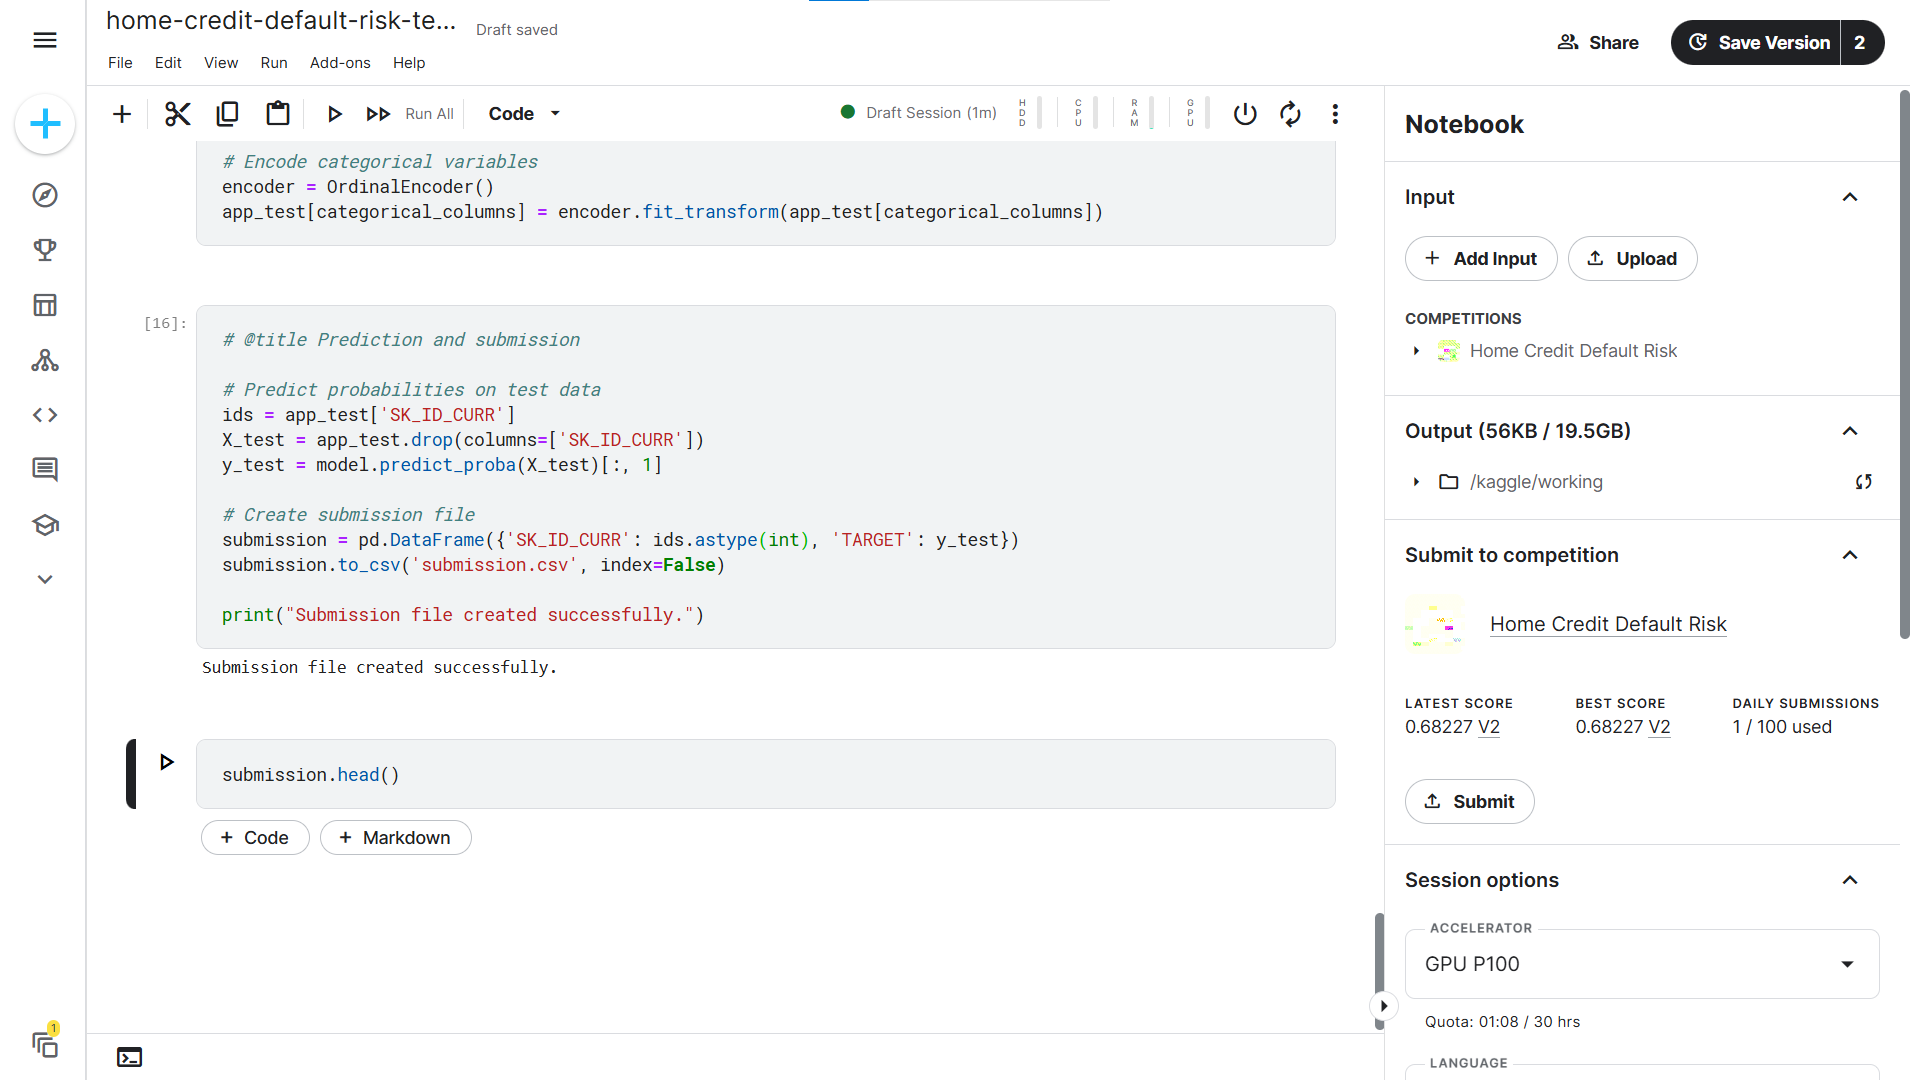

For the baselinemodel, we get a score of : **0.68227**


<div class="markdown-google-sans">

##**[Problem 4] Feature engineering**

</div>

In [ ]:
# @title Data acquisition
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dive into code/Data/application_train.csv')
app_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dive into code/Data/application_test.csv')

### Polynomial features

One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target.

We create polynomial features using the EXT_SOURCE variables and the DAYS_BIRTH variable. Scikit-Learn has a useful class called PolynomialFeatures that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting).

In [ ]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Get the target before droping it from the dataset
poly_target = poly_features['TARGET']

# Drop the target from the features
poly_features = poly_features.drop(columns = ['TARGET'])

# Impute missing values with the median values
imputer = SimpleImputer(strategy = 'median')
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree and fit it the selected datafram
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)

# Transform the features for both the train and test dataset
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


This creates a considerable number of new features. To get the names we have to use the polynomial features get_feature_names method.

In [ ]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [ ]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!

In [ ]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 156)
Testing data with polynomial features shape:   (48744, 156)


### Domain Knowledge Features

Here I'm going to use five features that were inspired by [this script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) by Aguiar:

- `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
- `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
- `CREDIT_TERM`: the length of the payment in months (since the annuity is the monthly amount due
- `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age

Again, thanks to Aguiar and [his great script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) for exploring these features.

In [ ]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [ ]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [ ]:
# @title Learning and validation patterns

# Target and features separation
X = app_train.drop(['TARGET'], axis=1)
y = app_train['TARGET']

# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Models to evaluate
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LightGBM" : LGBMClassifier(random_state=42, verbose=-1),
    "XGBClassifier": XGBClassifier(random_state=42)
}

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}
for name, model in models.items():
    # Creating the pipeline with preprocessing and template
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    # Model training
    pipeline.fit(X_train, y_train)
    # Prediction on validation set
    y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
    # ROC AUC score calculation
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    results[name] = roc_auc
    print(f"{name}: ROC AUC = {roc_auc:.4f}")

# Selection of the best model
best_model_name = max(results, key=results.get)
print(f"The best model is {best_model_name} with a ROC AUC of {results[best_model_name]:.4f}")

RandomForest: ROC AUC = 0.7092
LogisticRegression: ROC AUC = 0.7454
GradientBoosting: ROC AUC = 0.7521
LightGBM: ROC AUC = 0.7578
XGBClassifier: ROC AUC = 0.7505
The best model is LightGBM with a ROC AUC of 0.7578


Based on the results obtained from evaluating different models on the task of predicting Home Credit clients' repayment abilities, the LightGBM model emerged as the best performer with a ROC AUC score of 0.7578.

This indicates that LightGBM was the most effective at distinguishing between clients who will repay their loans and those who will not, compared to the other models tested.  Here's a summary of the ROC AUC scores for each model:  

- RandomForest: 0.7092
- LogisticRegression: 0.7454
- GradientBoosting: 0.7521
- XGBClassifier: 0.7505
- LightGBM: 0.7578

The LightGBM model outperformed the RandomForest, LogisticRegression, GradientBoosting, and XGBClassifier models in terms of ROC AUC score. This suggests that LightGBM's approach to handling tabular data, its efficiency, and its ability to deal with categorical features without extensive preprocessing make it a suitable choice for this specific prediction task.  

Given these results, we will proceed with the LightGBM model for generating predictions on the test dataset and preparing the submission file. This decision is based on the model's superior performance in the validation phase of the project.

In [ ]:
# @title New estimation with LightGBM model

# Creating the pipeline with preprocessing and template
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', LGBMClassifier(random_state=42, verbose=-1))])
# Model training
pipeline.fit(X_train, y_train)

# Predict probabilities with the LightGBM model
y_test_pred = pipeline.predict_proba(app_test)[:, 1]

# Create the submission DataFrame
submission = pd.DataFrame({
    'SK_ID_CURR': app_test['SK_ID_CURR'].astype(int),
    'TARGET': y_test_pred
})

# Save the submission file
submission_file_path = 'submission.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file '{submission_file_path}' created successfully.")

Submission file 'submission.csv' created successfully.


In [ ]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.037669
1,100005,0.146545
2,100013,0.019027
3,100028,0.032050
4,100038,0.111065


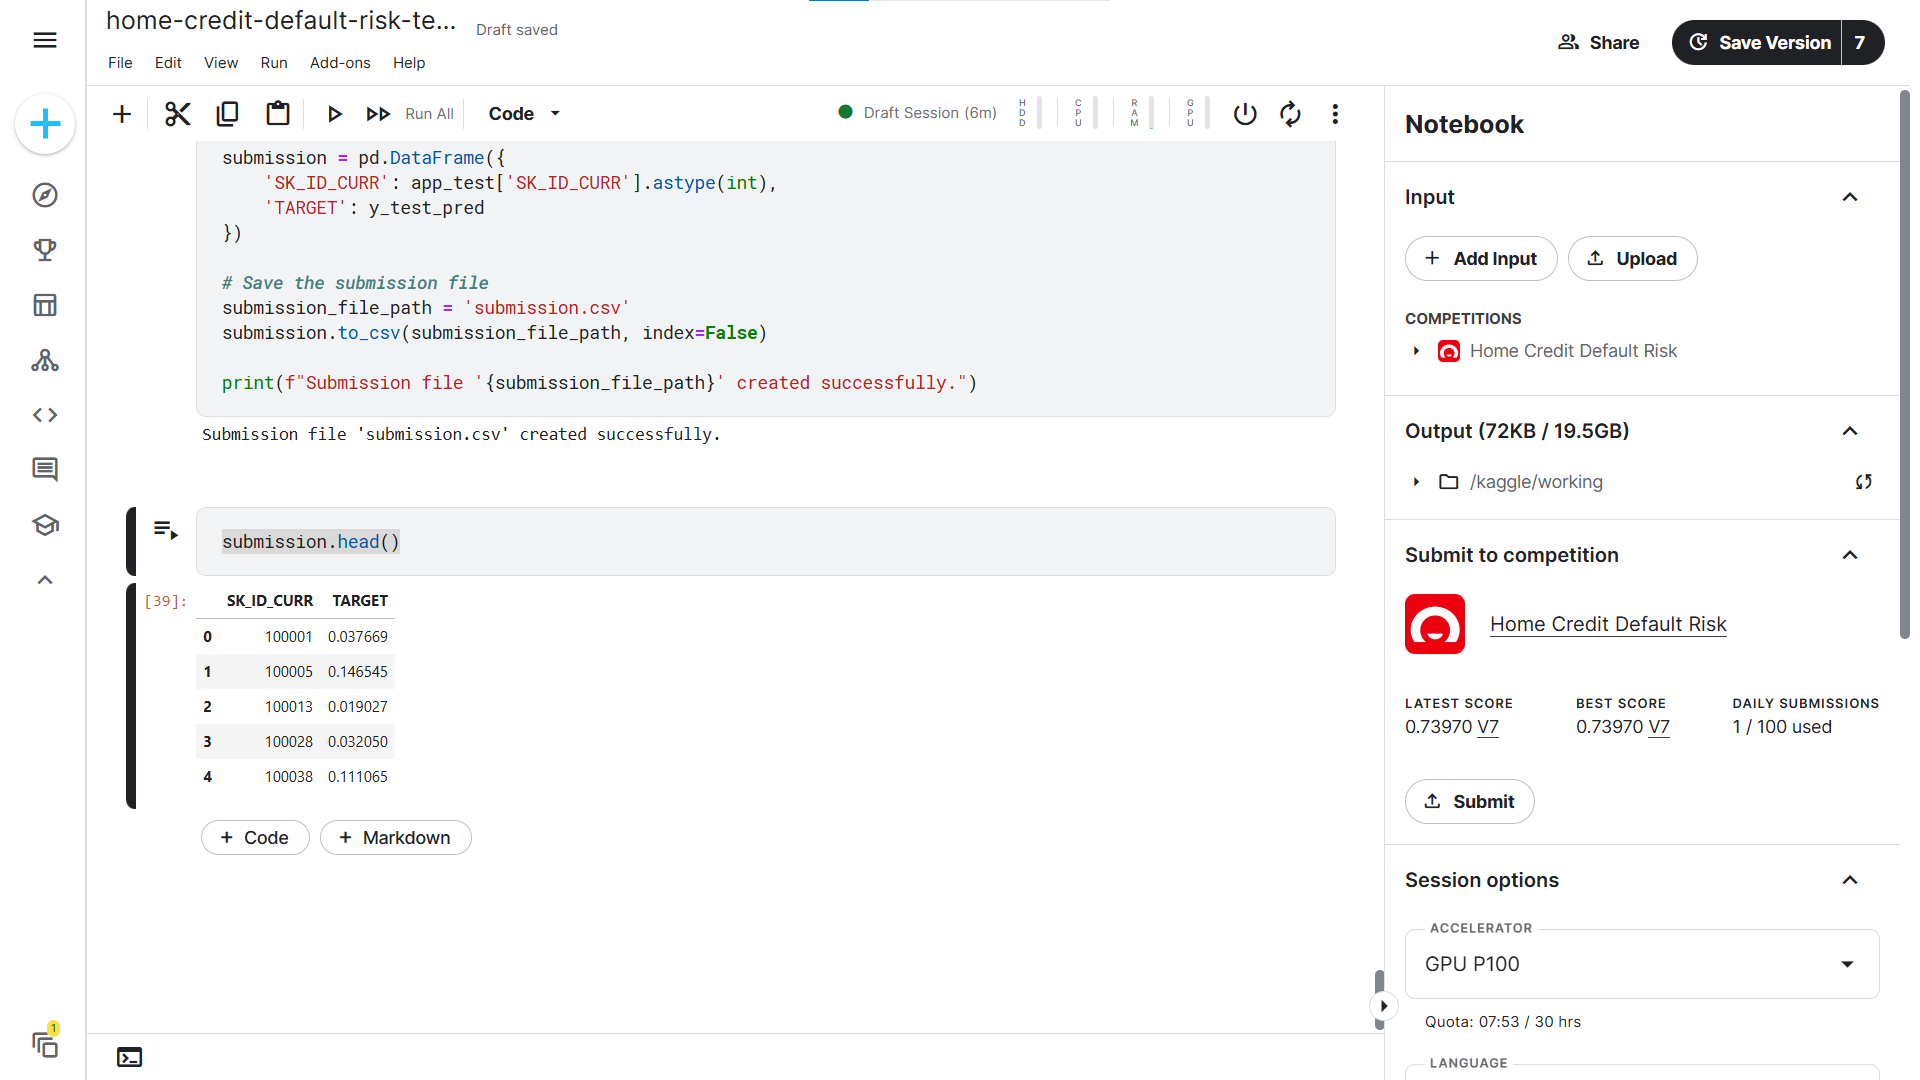

As you can observe it, with fetures engineering, we succeed to improve the model performance and with different validation patterns, we can conclude that LightGBM is the better model for this machine learning accross all models we test.



